# Utforskande Dataanalys (EDA) av Bostadsdata

Denna notebook syftar till att utföra en utforskande analys av bostadsdata "California housing dataset". Målet är att förstå datastrukturen, identifiera saknade värden och undersöka vilka faktorer som påverkar huspriserna.

# Utforskande analys av bostadsdata

Denna notebook utför en stegvis analys av ett bostadsdataset. Vi kommer att:
- Nödvändiga bibliotek
- Ladda och inspektera datan
- Utförska och hantera saknade värden
- Beskrivande statistik och grundläggande visualiseringar
- Prisfördelning och faktorer som påverkar priset

## 1. Nödvändiga bibliotek
Vi börjar med att importera de bibliotek som behövs för analysen: pandas, numpy, matplotlib och seaborn.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Ladda och inspektera datasetet
Läs in datasetet och visa de första raderna för att få en överblick över datan.

In [109]:
# Läs in datasetet
df = pd.read_csv("housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Vi behöver först förstå vilka egenskaper (features) det innehåller: *
* https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

- `longitude`, `latitude`: De geografiska koordinaterna för kvartersområdena.
- `housing_median_age`: Medianåldern på bostäderna inom ett kvarter.
- `total_rooms`: Det genomsnittliga antalet rum per bostad inom ett kvarter.
- `total_bedrooms`: Det genomsnittliga antalet sovrum per bostad inom ett kvarter.
- `population`: Det totala antalet invånare inom ett kvarter.
- `households`: Totalt antal hushåll – en grupp människor som bor i samma bostad – inom ett kvarter.
- `median_income`: Medianinkomsten för hushåll inom ett kvarter (skalad och begränsad till max 15 för höga medianinkomster och min 0,5 för låga medianinkomster).
- `median_house_value`: Medianvärdet på bostäder för hushåll inom ett kvarter (mätt i hundratusentals dollar).
- `ocean_proximity`: Husets läge i förhållande till havet.



Visa information om datatyper och antal icke-nan värden per kolumn

In [110]:
# Visa datatyper och antal icke-nan värden
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Vi ser att:
- Datasetet innehåller 20 640 observationer och 9 egenskaper (features).
- Alla egenskaper är numeriska förutom `ocean_proximity`.
- `total_rooms` har saknade värden.

## 3. Saknade värden
Undersök om det finns saknade värden i datasetet och visualisera dessa med en heatmap.

In [111]:
# Kontrollera antal saknade värden per kolumn
missing = df.isnull().sum()
missing[missing > 0]

total_bedrooms    207
dtype: int64

I den här datan förekommer oftast saknade värden i `total_bedrooms`. En enkel och vanlig strategi i EDA är att ersätta dessa med medianen.

In [112]:
if df["total_bedrooms"].isna().any():
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 4. Beskrivande statistik och grundläggande visualiseringar
Vi skapar histogram för att undersöka fördelningen av de numeriska variablerna i datasetet.

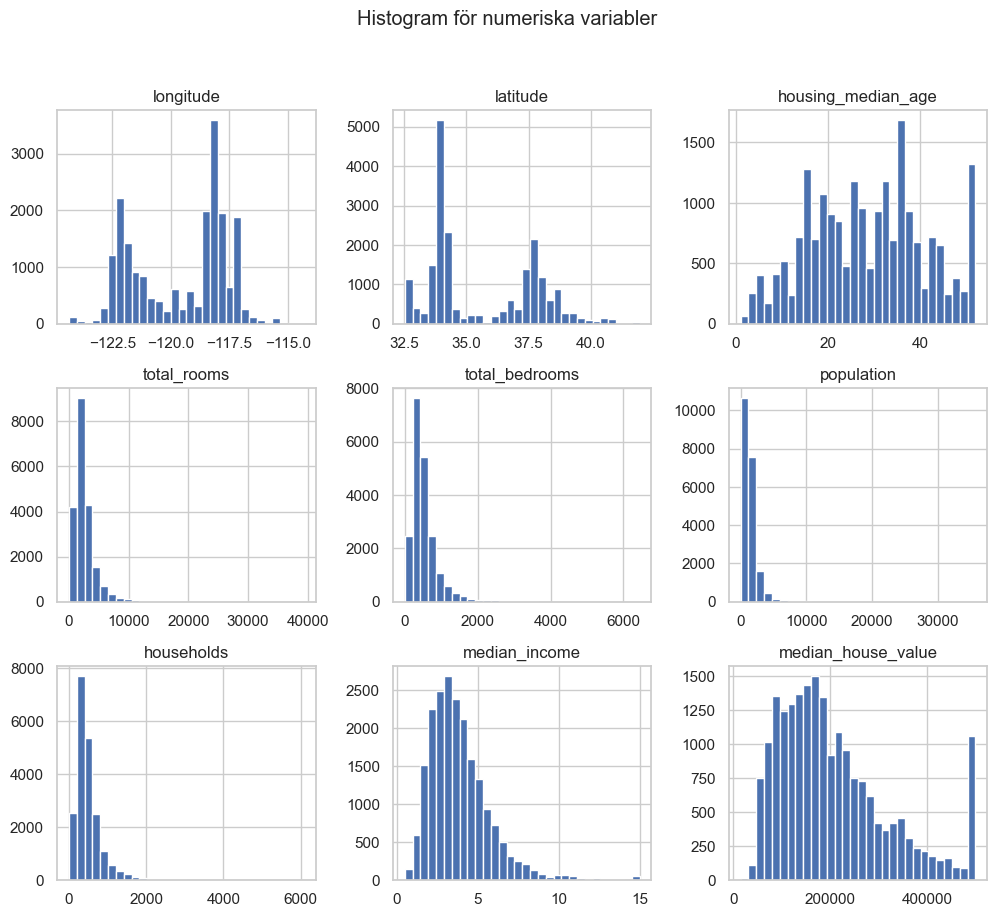

In [113]:
# Histogram för alla numeriska variabler
df.hist(figsize=(12, 10), bins=30)
plt.suptitle('Histogram för numeriska variabler')
plt.show()

`housing_median_age` har relativt jämn medan `median_icome` har en fördelning med en lång svans. Det innebär att lönerna i stort sett är normalfördelade, men att det finns en mindre grupp människor som har mycket höga inkomster.

Vi kan isualisera och analysera fördelningen av huspriser:

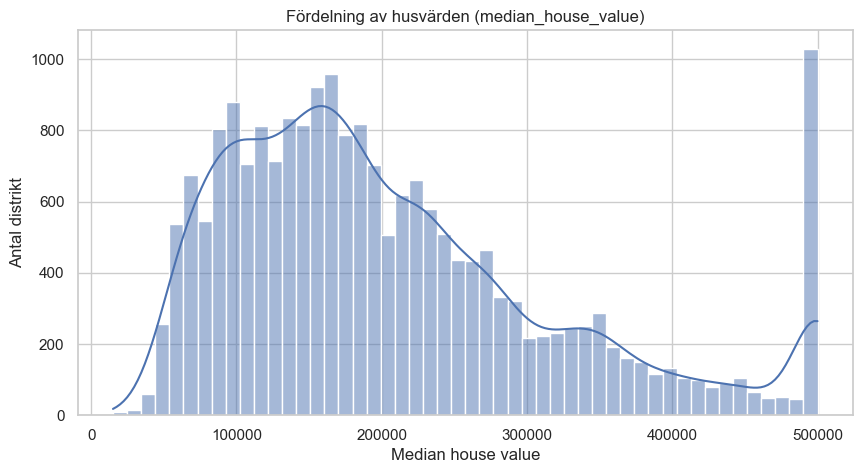

In [114]:
plt.figure(figsize=(10, 5))
sns.histplot(df["median_house_value"], bins=50, kde=True)
plt.title("Fördelning av husvärden (median_house_value)")
plt.xlabel("Median house value")
plt.ylabel("Antal distrikt")
plt.show()


Det som verkar ha hänt är att alla genomsnittliga husvärden över ett visst tröskelvärde har justerats ned till just detta tröskelvärde. En möjlig förklaring till detta är att man velat undvika att de ska få ett alltför stort genomslag på medelvärdet.

Vi kan fokusera mer på `total_rooms`, `total_bedrooms`, `population`, `households` där vi ser att datans spridning är stor. Den stora skillnaden blir tydlig när vi tittar på statistiken för dessa egenskaper:

In [115]:
cols_of_interest = ["total_rooms", "total_bedrooms", "population", "households"]

df[cols_of_interest].describe()

,total_rooms,total_bedrooms,population,households
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,2635.763081,536.838857,1425.476744,499.539680
std,2181.615252,419.391878,1132.462122,382.329753
min,2.000000,1.000000,3.000000,1.000000
25%,1447.750000,297.000000,787.000000,280.000000
50%,2127.000000,435.000000,1166.000000,409.000000
75%,3148.000000,643.250000,1725.000000,605.000000
max,39320.000000,6445.000000,35682.000000,6082.000000


När vi jämför maxvärdet med 75%, ser vi en mycket stor skillnad. Detta bekräftar att det finns ett fåtal extrema värden.

Vi ser det här tydlig med boxplot:

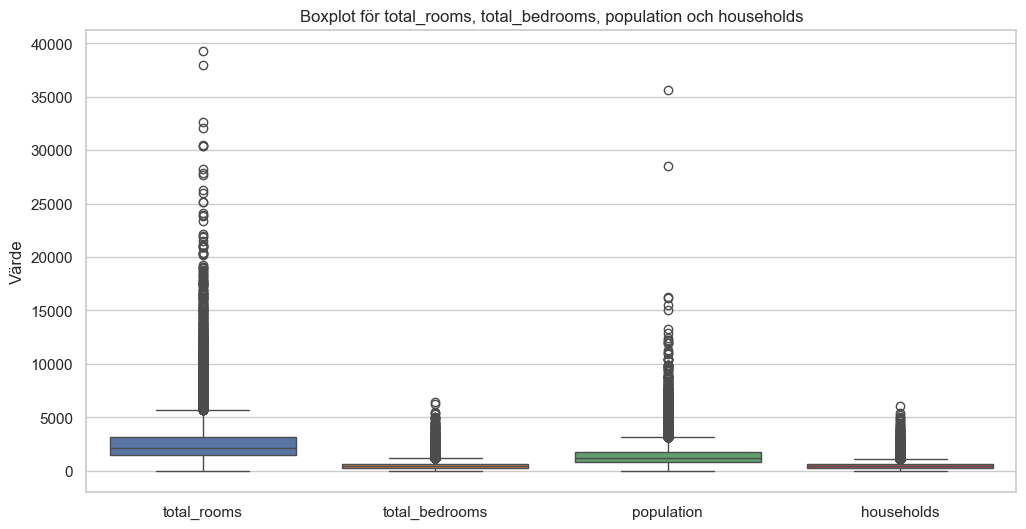

In [116]:
# Boxplot för att identifiera outliers i cols_of_interest
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols_of_interest])
plt.title("Boxplot för total_rooms, total_bedrooms, population och households")
plt.ylabel("Värde")
plt.show()

Vi visualiserar huspriserna baserat på geografisk position (latitud och longitud).

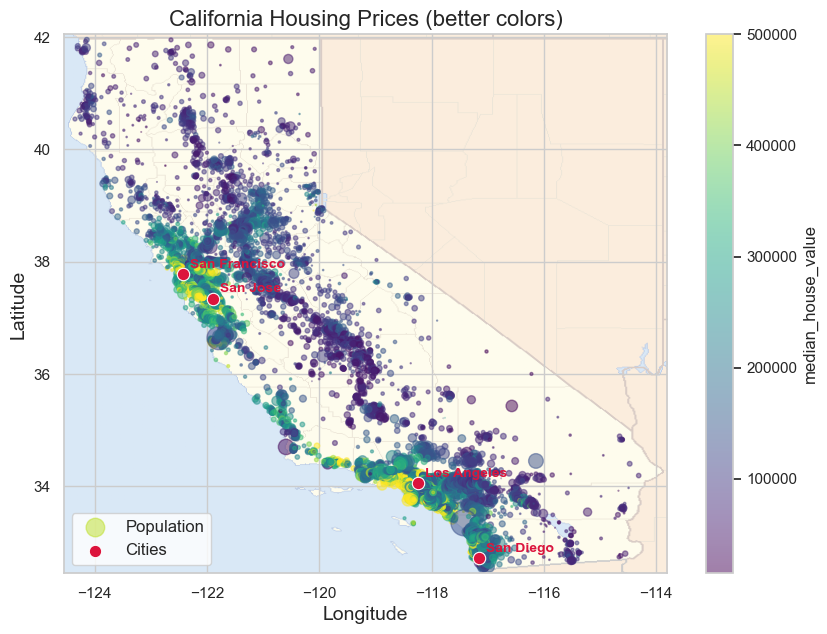

In [117]:
import matplotlib.image as mpimg

california_img = mpimg.imread('california.png')
ax = df.plot(
    kind="scatter", x="longitude", y="latitude", figsize=(10, 7),
    s=df['population'] / 100, label="Population",
    c="median_house_value", cmap="viridis",
    colorbar=True, alpha=0.5
)
ax.imshow(
    california_img, extent=[-124.55, -113.80, 32.45, 42.05],
    alpha=0.4
)

# Markera storstäder
city_color = "crimson"
ax.scatter(
    [lon for lon, lat in cities.values()],
    [lat for lon, lat in cities.values()],
    s=80, c=city_color, edgecolors="white", linewidths=0.8,
    zorder=5, label="Cities"
)
for name, (lon, lat) in cities.items():
    ax.annotate(
        name, (lon, lat),
        xytext=(5, 5), textcoords="offset points",
        fontsize=10, color=city_color, weight="bold",
        zorder=6
    )

ax.set_ylabel("Latitude", fontsize=14)
ax.set_xlabel("Longitude", fontsize=14)
ax.legend(fontsize=12, loc="lower left")
ax.set_title("California Housing Prices (better colors)", fontsize=16)
plt.show()

Vi noterar att de högst värderade husen är belägna längs kusten, där de stora städerna i Kalifornien ligger: San Diego, Los Angeles, San Jose och San Francisco.

Vi kan nu titta på fördelning av ocean_proximity:

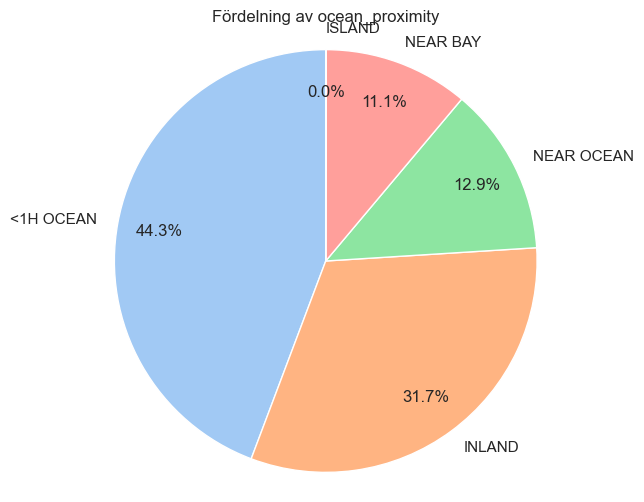


Distribution av ocean_proximity:
ocean_proximity  Antal  Procent
      <1H OCEAN   9136     44.3
         INLAND   6551     31.7
     NEAR OCEAN   2658     12.9
       NEAR BAY   2290     11.1
         ISLAND      5      0.0


In [118]:
# Pie chart för fördelning av ocean_proximity
counts = df["ocean_proximity"].value_counts()
plt.figure(figsize=(6, 6))
colors = sns.color_palette("pastel", len(counts))
counts.plot.pie(autopct="%1.1f%%", startangle=90, colors=colors, pctdistance=0.8)
plt.ylabel("") 
plt.title("Fördelning av ocean_proximity")
plt.axis("equal")  
plt.show()

# Tabell med distribution
distribution_table = pd.DataFrame({
    'ocean_proximity': counts.index,
    'Antal': counts.values,
    'Procent': (counts.values / counts.sum() * 100).round(1)
})
print("\nDistribution av ocean_proximity:")
print(distribution_table.to_string(index=False))

- Nästan hälften av alla områden ligger mindre än en timme från havet.
- Cirka en tredjedel av områdena ligger inåt landet.
- 24 % av områdena ligger nära havet eller en bukt (t.ex. San Francisco Bay).
- Endast 5 områden ligger på en ö, vilket är försumbart i sammanhanget.

Det finns ett antal nyckeltal som är vanliga i bostadsanalys. Vi skapar några mer tolkbara nyckeltal per hushåll:
- `price_group`: Dela in huspriser i flera grupper.
- `rooms_per_household`: Genomsnittligt antal rum per hushåll. Ett högre värde kan tyda på större bostäder eller mindre trångboddhet.
- `bedrooms_per_room`: Andel sovrum av det totala antalet rum. Ett lägre värde kan indikera att bostäderna har fler vardagsrum eller andra typer av rum utöver sovrum.
- `population_per_household`: Genomsnittligt antal personer per hushåll. Ett högre värde tyder på trångboddhet, medan ett lägre värde tyder på att hushållen är mindre.

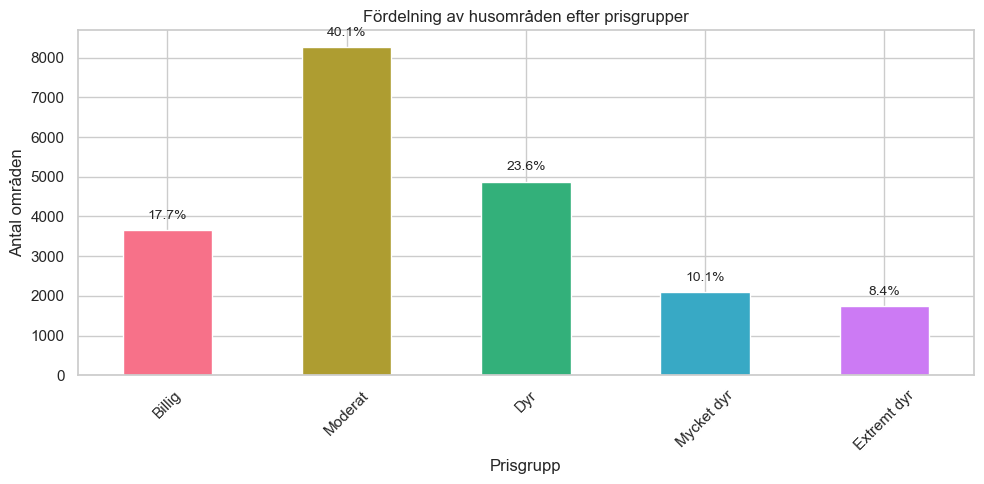

In [119]:
# Skapa nyckeltal
price_bins = [0, 100000, 200000, 300000, 400000, 500001]
price_labels = ['Billig', 'Moderat', 'Dyr', 'Mycket dyr', 'Extremt dyr']

df['price_group'] = pd.cut(df['median_house_value'], bins=price_bins, labels=price_labels, right=True)

# Räkna och beräkna procent
counts = df['price_group'].value_counts().sort_index()
pct = (counts / counts.sum() * 100).round(1)

# Visualisera prisfördelningen med procentetiketter
plt.figure(figsize=(10, 5))
ax = counts.plot(kind='bar', color=sns.color_palette("husl", len(counts)))
plt.title('Fördelning av husområden efter prisgrupper')
plt.xlabel('Prisgrupp')
plt.ylabel('Antal områden')
plt.xticks(rotation=45)

# Lägg till procentetiketter ovanpå staplarna
for i, idx in enumerate(counts.index):
    cnt = counts.loc[idx]
    p = pct.loc[idx]
    ax.annotate(f'{p:.1f}%', xy=(i, cnt), xytext=(0, 6), textcoords='offset points', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [120]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["population_per_household"] = df["population"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]

df[["rooms_per_household","population_per_household","bedrooms_per_room"]].describe()

,rooms_per_household,population_per_household,bedrooms_per_room
count,20640.000000,20640.000000,20640.000000
mean,5.429000,3.070655,0.213794
std,2.474173,10.386050,0.065248
min,0.846154,0.692308,0.037151
25%,4.440716,2.429741,0.175225
50%,5.229129,2.818116,0.203159
75%,6.052381,3.282261,0.240126
max,141.909091,1243.333333,2.824675


## 5. Prisfördelning och faktorer som påverkar priset
Vi undersöker korrelationen mellan olika variabler och huspriset för att förstå vilka faktorer som har störst påverkan.

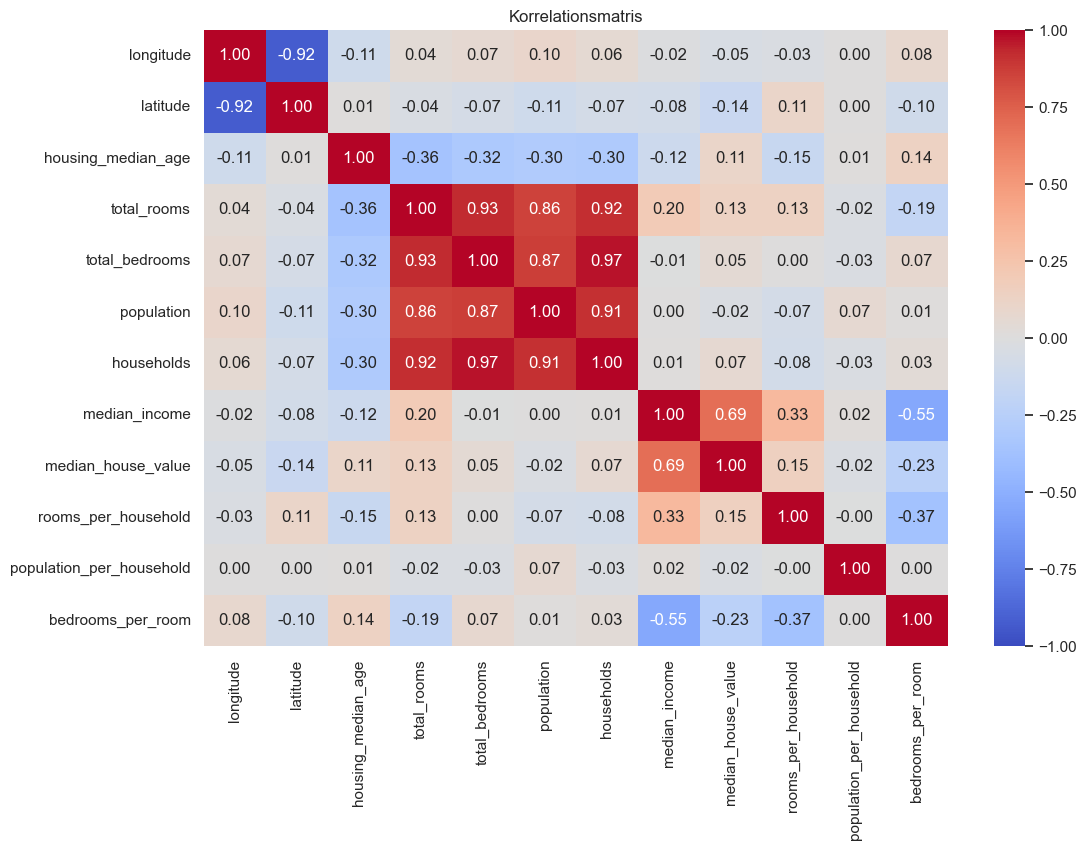

In [121]:
# korrelationsmatrisen
corr_matrix = df.select_dtypes(include=[np.number]).corr()

# Visualisera korrelationsmatrisen
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korrelationsmatris")
plt.show()

Vi tittar närmare på vilka variabler som korrelerar mest med `median_house_value`.

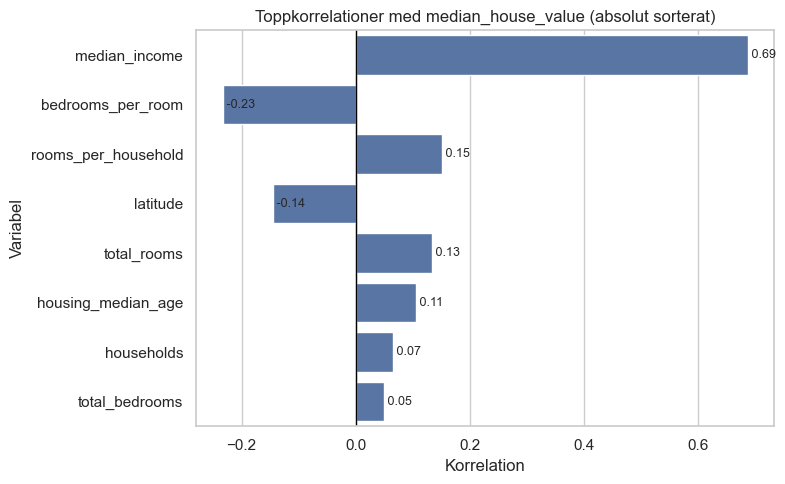

In [122]:
target = "median_house_value"

numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_with_target = df[numeric_cols].corr()[target].dropna().sort_values(key=lambda s: s.abs(), ascending=False).drop(index=target, errors="ignore")

# Visualisera toppkorrelationer med target
plt.figure(figsize=(8, 5))
sns.barplot(x=corr_with_target.head(8).values, y=corr_with_target.head(8).index, orient="h")
plt.title("Toppkorrelationer med median_house_value (absolut sorterat)")
plt.xlabel("Korrelation")
plt.ylabel("Variabel")
plt.axvline(0, color="black", linewidth=1)

# Lägg till värden
for i, v in enumerate(corr_with_target.head(8).values):
    plt.text(v, i, f' {v:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

Vi ser att `median_income` har den starkaste positiva korrelationen med huspriset. Låt oss visualisera detta samband tydligare.
Däremot hänger hög andel sovrum av alla rum ihop med lägre pris. Ofta tolkas det som att bostäderna har mindre yta/standard per rum eller mer “trång” planlösning.

Eftersom `ocean_proximity` är kategorisk kan vi inte använda vanlig korrelation direkt. I stället jämför vi prisnivåer mellan kategorier.

<Figure size 1000x400 with 0 Axes>

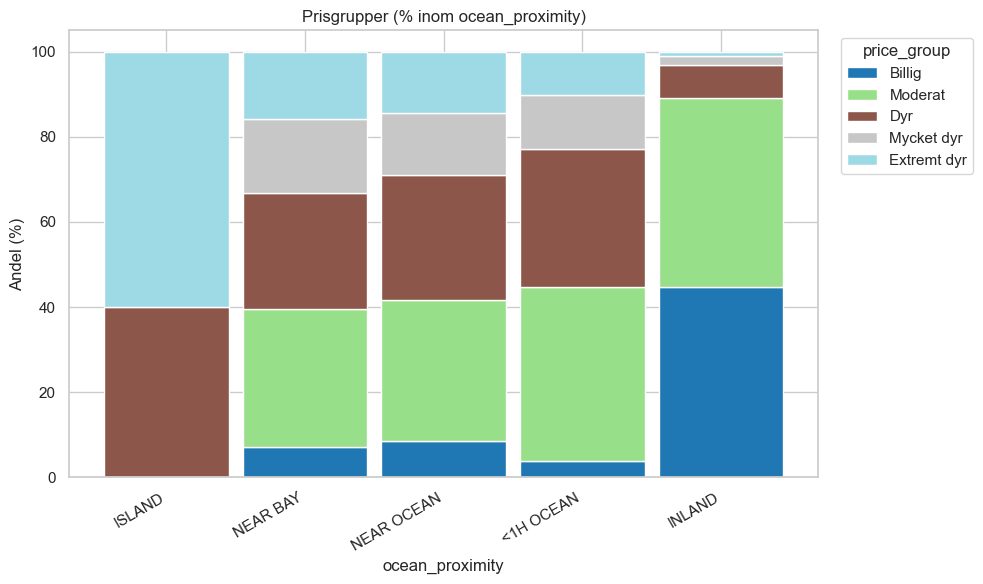

In [123]:
# Sammanfattning per ocean_proximity
summary_ocean = (
    df.groupby("ocean_proximity")[target]
        .agg(["count", "mean", "median"])
        .sort_values("median", ascending=False)
)

# Extra: prisgrupper per ocean_proximity (andelar) för att se mixen tydligt
if "price_group" in df.columns:
    ct = pd.crosstab(df["ocean_proximity"], df["price_group"], normalize="index") * 100
    ct = ct.loc[summary_ocean.index]  # samma ordning som ovan

    plt.figure(figsize=(10, 4))
    ct.plot(kind="bar", stacked=True, colormap="tab20", width=0.9)
    plt.title("Prisgrupper (% inom ocean_proximity)")
    plt.xlabel("ocean_proximity")
    plt.ylabel("Andel (%)")
    plt.xticks(rotation=30, ha="right")
    plt.legend(title="price_group", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

### Slutsatser (EDA)
- Högre inkomstnivå hänger ihop med högre husvärden.
- Fler sovrum relativt antal rum samt högre latitud tenderar att hänga ihop med lägre pris.
- Antal rum per hushåll har svag positiv samband
- Kustnära områden har generellt högre prisnivåer.

### Har något varit utmanande i kursen/kunskapskontrollerna? Om ja, hur har du hanterat det? Vilka lärdomar tar du med dig till framtida kurser?
Jag har inte märkt någon större utmaning inom ramen för denna kurs. Jag har redan erfarenhet med Python och Notebooks från mitt arbete som dataanalytiker därför jag känner till stora delar av detta.

### Vilket betyg anser du att du ska ha och varför?
Jag hoppas att jag ska ha ett högt betyg eftersom jag har uppfyllt målen för kursen så länge,  tycker jag.

### Något du vill lyfta fram till Terese?
Undervisningen har varit tydlig och strukturerad och kursen har varit väl upplagd. 